## Competition description:

Can you find more cat in your dat?

We loved the participation and engagement with the first Cat in the Dat competition.

Because this is such a common task and important skill to master, we've put together a dataset that contains only categorical features, and includes:

binary features low- and high-cardinality nominal features low- and high-cardinality ordinal features (potentially) cyclical features This follow-up competition offers an even more challenging dataset so that you can continue to build your skills with the common machine learning task of encoding categorical variables. This challenge adds the additional complexity of feature interactions, as well as missing data.

This Playground competition will give you the opportunity to try different encoding schemes for different algorithms to compare how they perform. We encourage you to share what you find with the community.

1. [Import packages](#1)
1. [Load data](#2)
1. [ Data visualization](#3)
1. [Preprocessing the digit images](#4)
1. [First model try](#5)
1. [First Submission to Kaggle](#6)
1. [OverSampling methods](#7)
1. [GridSearchCV](#8)
1. [Ensemble methods](#9)
1. [Deep Learning methods](#10)

<a id="1"></a> <br>
## Import packages

In [1]:
import pandas as pd
import numpy as np
import string
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score as auc
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%matplotlib inline


import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)


from IPython.display import Markdown
def bold(string):
    display(Markdown(string))
    
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.model_selection as ms
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import LinearSVC



from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model 
from sklearn import naive_bayes 

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import FeatureUnion

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base


import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

<a id="2"></a> <br>
## Load data

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

In [12]:
train.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,600000.000000,582106.000000,581997.000000,582070.000000,581712.000000,582048.000000,582012.000000,600000.000000
mean,299999.500000,0.092301,0.185532,0.278704,1.948224,4.112767,6.371317,0.187205
std,173205.225094,0.289451,0.388729,0.448362,0.853904,2.034430,3.458959,0.390076
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,149999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000
50%,299999.500000,0.000000,0.000000,0.000000,2.000000,5.000000,6.000000,0.000000
75%,449999.250000,0.000000,0.000000,1.000000,3.000000,6.000000,8.000000,0.000000
max,599999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.000000


In [13]:
test.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month
count,400000.000000,388099.000000,387962.000000,388028.000000,388107.000000,387975.000000,388016.000000
mean,799999.500000,0.093590,0.187155,0.278408,1.950125,4.109863,6.369727
std,115470.198175,0.291257,0.390036,0.448216,0.853915,2.034803,3.455644
min,600000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,699999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,799999.500000,0.000000,0.000000,0.000000,2.000000,5.000000,6.000000
75%,899999.250000,0.000000,0.000000,1.000000,3.000000,6.000000,8.000000
max,999999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000


Let's use a function who summarise some precious informations

In [11]:
def description(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary
bold('**Variable Description of  train Data:**')
description(train)

**Variable Description of  train Data:**

Dataset Shape: (600000, 25)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,id,int64,0,600000,0,1,2
1,bin_0,float64,17894,2,0,1,0
2,bin_1,float64,18003,2,0,1,1
3,bin_2,float64,17930,2,0,0,0
4,bin_3,object,18014,2,F,F,F
5,bin_4,object,18047,2,N,Y,N
6,nom_0,object,18252,3,Red,Red,Red
7,nom_1,object,18156,6,Trapezoid,Star,NaN
8,nom_2,object,18035,6,Hamster,Axolotl,Hamster
9,nom_3,object,18121,6,Russia,NaN,Canada


We can see that there are a lot of missing values, we need to deal with that.

I think the best method for this project is to use the .mode(). Mode Function in python pandas is used to calculate the mode or most repeated value of a given set of numbers. 

In [34]:
### approfondir car y a p'te tmieux que mode(), par exemple mean pour bin ect

def replace_nan(data):
    for column in data.columns:
        if data[column].isna().sum() > 0:
            data[column] = data[column].fillna(data[column].mode()[0])


replace_nan(train)
replace_nan(test)

<a id="3"></a> <br>
## Data visualization

For these visualisations, I took inspiration from this kernel : https://www.kaggle.com/vikassingh1996/don-t-underestimate-the-power-of-a-logistic-reg 

### Target distribution

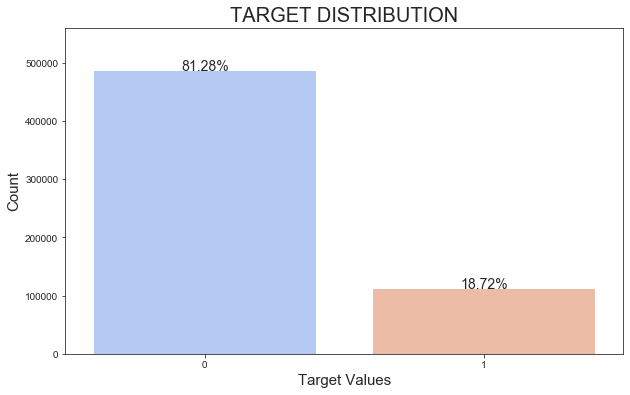

In [29]:
total = len(train)
plt.figure(figsize=(10,6))

g = sns.countplot(x='target', data=train, palette='coolwarm')
g.set_title("TARGET DISTRIBUTION", fontsize = 20)
g.set_xlabel("Target Values", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
sizes=[] # Get highest values in y
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

plt.show()

We can see that our target feature is very unbalanced. Maybe we'll need to do some oversampling/undersampling there ? We'll see.

### Binary feature (two modalities)

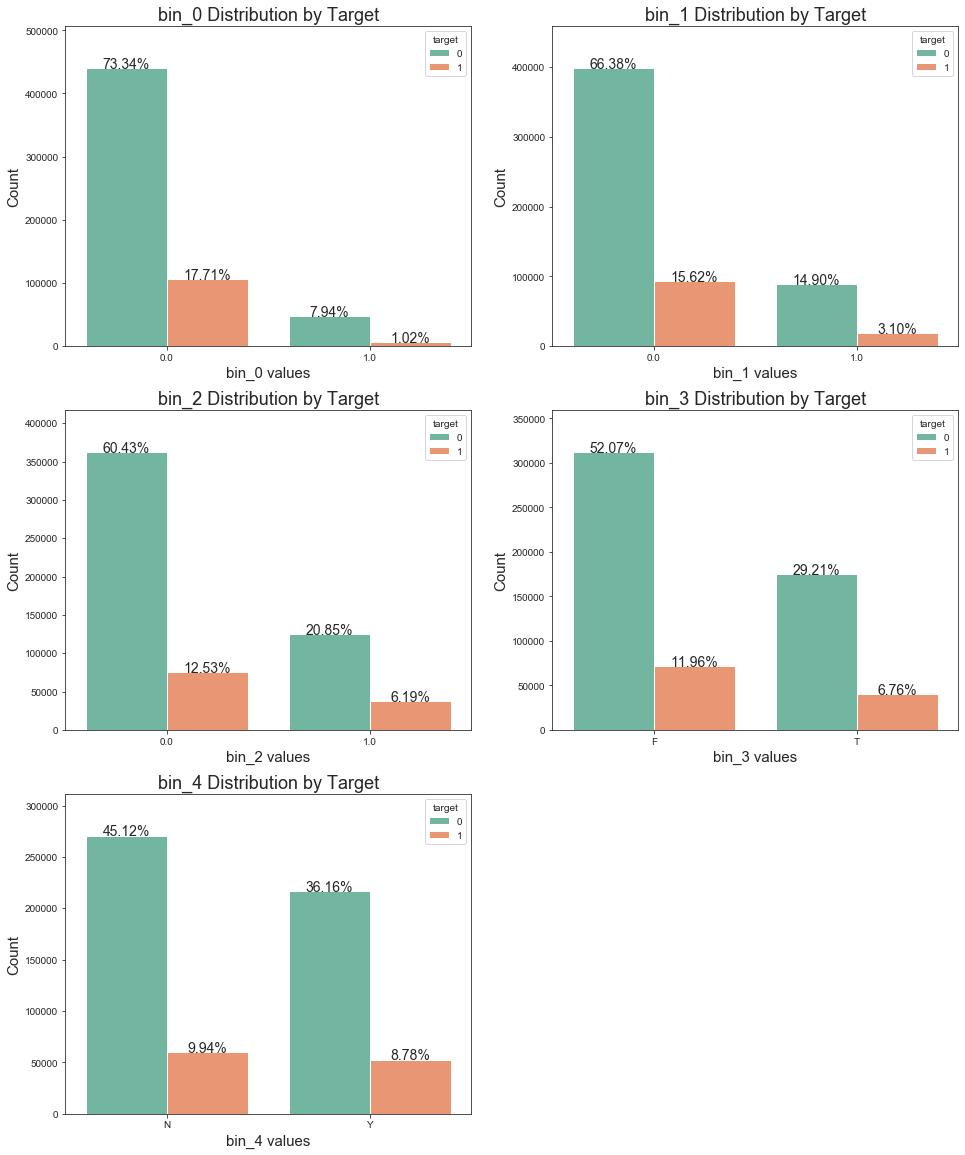

In [31]:
bin_cols = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 2) # The grid of chart
plt.figure(figsize=(16,20)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(train[bin_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=train, hue='target', palette='Set2') 
    ax.set_ylabel('Count', fontsize=15) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
    ax.set_xlabel(f'{col} values', fontsize=15) # x axis label
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14) 
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights
    
plt.show()

In binary variables, it seens that only bin_0 is imbalanced.

### Nominal Features (with more than 2 and less than 15 values)

In [32]:
nom_cols = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']


def ploting_cat_fet(df, cols, vis_row=5, vis_col=2):
    
    grid = gridspec.GridSpec(vis_row,vis_col) # The grid of chart
    plt.figure(figsize=(17, 35)) # size of figure

    # loop to get column and the count of plots
    for n, col in enumerate(train[cols]): 
        tmp = pd.crosstab(train[col], train['target'], normalize='index') * 100
        tmp = tmp.reset_index()
        tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

        ax = plt.subplot(grid[n]) # feeding the figure of grid
        sns.countplot(x=col, data=train, order=list(tmp[col].values) , palette='Set1') 
        ax.set_ylabel('Count', fontsize=15) # y axis label
        ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
        ax.set_xlabel(f'{col} values', fontsize=15) # x axis label

        # twinX - to build a second yaxis
        gt = ax.twinx()
        gt = sns.pointplot(x=col, y='Yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
        gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
        gt.set_ylabel("Target %True(1)", fontsize=16)
        sizes=[] # Get highest values in y
        for p in ax.patches: # loop to all objects
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center", fontsize=14) 
        ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights


    plt.subplots_adjust(hspace = 0.5, wspace=.3)
    plt.show()

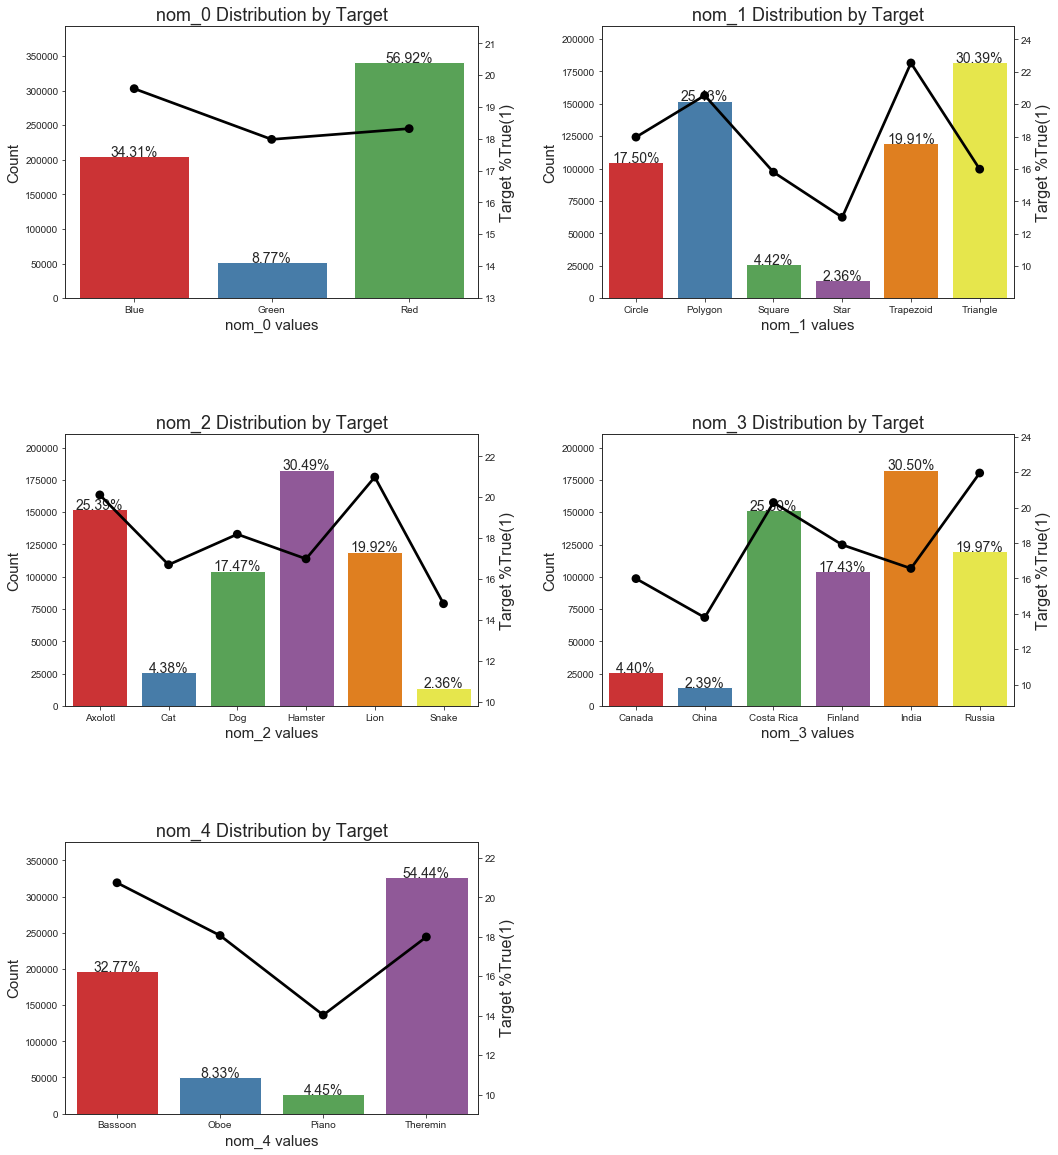

In [35]:
ploting_cat_fet(train, nom_cols, vis_row=5, vis_col=2)

with mode it's quite unclear to see a real trend'

### Ordinal Features (with more than 2 and less than 15 values)

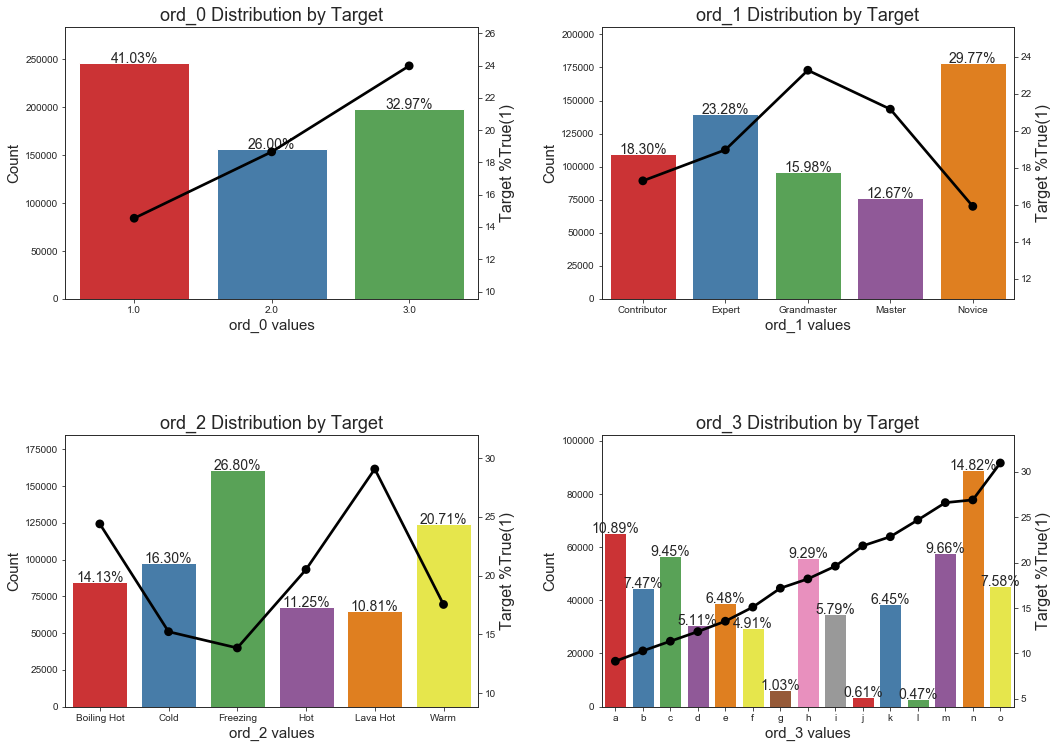

In [37]:
ord_cols = ['ord_0', 'ord_1', 'ord_2', 'ord_3']

#Ploting
ploting_cat_fet(train, ord_cols, vis_row=5, vis_col=2)

### Date Features

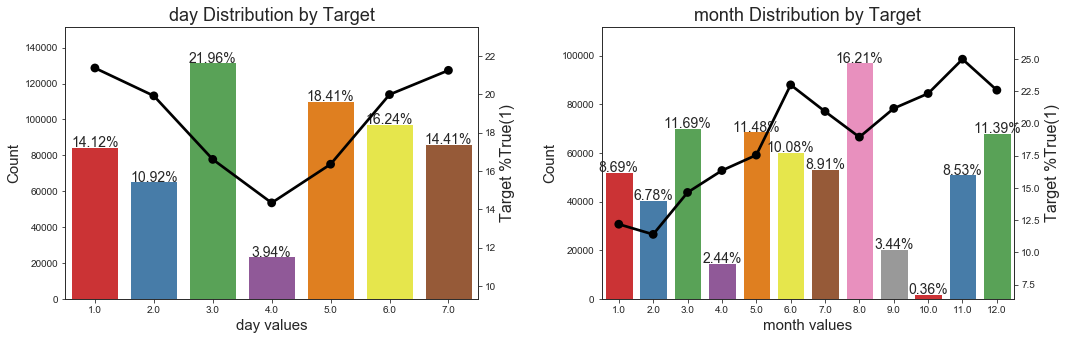

In [40]:
date_cols = ['day', 'month']

# Calling the plot function with date columns
ploting_cat_fet(train, date_cols, vis_row=5, vis_col=2)

<a id="4"></a> <br>
## Feature engineering

In [43]:
train.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

Let's create our target variable, our train set (to build and experiment our models) and our test set (to predict and submit to Kaggle).

In [35]:
target = train['target']
train_id = train['id']
test_id = test['id']
train.drop(['target', 'id'], axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

print(train.shape)
print(test.shape)
print(target.shape)

(600000, 23)
(400000, 23)
(600000,)


In [36]:

# I choose OHE because it was the best methods on my first playthourgh


from sklearn.preprocessing import OneHotEncoder

In [37]:
%%time

one = OneHotEncoder()
one.fit(train)
train_ohe = one.transform(train)
print('train data set has got {} rows and {} columns'.format(train_ohe.shape[0],train_ohe.shape[1]))

train data set has got 600000 rows and 5700 columns
Wall time: 2.16 s


way faster and efficient than get_dummies

In the beginning, I went for OneHotEncoder instead of get_dummies because it's way faster to process. But in the end, get_dummies turned out to be more efficient in this kind of scenario

In [ ]:
data = pd.concat([train, test])

columns = [i for i in data.columns]
dummies = pd.get_dummies(data,columns=columns, drop_first=True,sparse=True)

train_ohe = dummies.iloc[:train.shape[0], :]
test_ohe = dummies.iloc[train.shape[0]:, :]

'''Covert dataframe to spare matrix'''

train_ohe = train_ohe.sparse.to_coo().tocsr()
test_ohe = test_ohe.sparse.to_coo().tocsr()

<a id="5"></a> <br>
## First model try

Let's create a function who give all the necessary metrics in outputs.

In [28]:
def Logistic(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    Logit = LogisticRegression().fit(X_train, y_train)
    y_pred = Logit.predict(X_test)
    probs = Logit.predict_proba(X_test)
    fpr, tpr, seuils = roc_curve(y_test, probs[:,1])
    roc_auc = auc(fpr,tpr)
    print('The accuracy is :', accuracy_score(y_test, y_pred))
    print()
    print()
    print(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
    print()
    print()
    print(classification_report(y_test, y_pred))
    print()
    print()
    print('Score :', Logit.score(X_test, y_test))
    print()
    print('roc AUC', roc_auc)

In [12]:
Logistic(train_ohe, target)

The accuracy is : 0.824625


Classe prédite      0     1
Classe réelle              
0               93997  3643
1               17402  4958


              precision    recall  f1-score   support

           0       0.84      0.96      0.90     97640
           1       0.58      0.22      0.32     22360

    accuracy                           0.82    120000
   macro avg       0.71      0.59      0.61    120000
weighted avg       0.79      0.82      0.79    120000



Score : 0.824625

roc AUC 0.7844399702385969


Hmm those metrics are quite good but we can see that the modalities 1 are less well predicted, but it stay reasonable. Let's see if this kind of model generalize well with a cross-validation.

In [15]:
KFold = StratifiedKFold(n_splits=5, random_state=42)

scores = {}

def score_model(model):
    return cross_val_score(model, train_ohe, target, scoring='roc_auc', cv = KFold)

In [16]:
scores['LR'] = score_model(LogisticRegression())

In [17]:
model_scores = pd.DataFrame(scores).mean()
model_scores = model_scores.sort_values(ascending=False)
#model_scores.to_csv('model_scores.csv', index=False)
print('Model scores\n{}'.format(model_scores))

Model scores
LR    0.782874
dtype: float64


It seems that this simple model generalise good enough, let's try to make a first submission to kaggle, just to see the result.

<a id="6"></a> <br>
## First submit to Kaggle

In [18]:
Logit = LogisticRegression().fit(train_ohe, target)

In [19]:
submission = pd.read_csv("sample_submission.csv")
submission["id"] = test_id
submission["target"] = Logit.predict_proba(test_ohe)[:, 1]
submission.to_csv("submission.csv", index=False)

We obtained 0.7851, we are 337/551, not bad for a first try, let's see if we can improve that now. The first things that come to my mind is Oversampling, Ensemble methods and hyperparameters tuning, so let's try !


<a id="7"></a> <br>
## OverSampling methods

In [22]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

Using TensorFlow backend.


### RandomOverSampler

In [25]:
sampler = RandomOverSampler(random_state=12, sampling_strategy = 1.0)
X_rs, y_rs = sampler.fit_sample(train_ohe, target)

In [28]:
KFold = StratifiedKFold(n_splits=3, random_state=42)

def score_model(model):
    return cross_validate(model, X_rs, y_rs, scoring='roc_auc', cv = KFold)

ScoreLR = score_model(LogisticRegression())

In [29]:
pd.DataFrame(ScoreLR).mean()

fit_time      6.640573
score_time    0.117353
test_score    0.793029
dtype: float64

In [30]:
Logit = LogisticRegression().fit(X_rs, y_rs)

In [31]:
submission = pd.read_csv("sample_submission.csv")
submission["id"] = test_id
submission["target"] = Logit.predict_proba(test_ohe)[:, 1]
submission.to_csv("submission.csv", index=False)

We obtained 0,77856, slightly worse than earlier.Let's try SMOTE

### SMOTE

In [32]:
sampler = SMOTE(random_state=12, sampling_strategy = 1.0)
X_rs, y_rs = sampler.fit_sample(train_ohe, target)

In [34]:
KFold = StratifiedKFold(n_splits=3, random_state=42)

def score_model(model):
    return cross_val_score(model, X_rs, y_rs, scoring='roc_auc', cv = KFold)

ScoreLR = score_model(LogisticRegression())

In [37]:
pd.DataFrame(ScoreLR).mean()

0    0.933061
dtype: float64

Nice auc !!

In [38]:
Logit = LogisticRegression().fit(X_rs, y_rs)

In [39]:
submission = pd.read_csv("sample_submission.csv")
submission["id"] = test_id
submission["target"] = Logit.predict_proba(test_ohe)[:, 1]
submission.to_csv("submission.csv", index=False)

Just slightly worse than without oversampling. That's quite weird. It seems that OverSampling is not a good pick here. I guess it's happened but I'm quite shock given the AUC obtained with cross_val_score. Maybe overfitting ?

<a id="8"></a> <br>
## GridSearchCV

In [45]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(train_ohe,target)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8247533333333333


Here's our tuned hyperparameters. Let's create a model with those specific parameters and submit to Kaggle.

In [50]:
Logit = LogisticRegression(solver = 'lbfgs', C =  0.1, penalty = 'l2').fit(train_ohe, target)

In [51]:
submission = pd.read_csv("sample_submission.csv")
submission["id"] = test_id
submission["target"] = Logit.predict_proba(test_ohe)[:, 1]
submission.to_csv("submission.csv", index=False)

0.78137 , I gain 10 places on the leaderboard. Not bad The first 400 place are all within 0,78 and 0.78600 approximately, so quite nice. But we can do better.

<a id="9"></a> <br>
## Ensemble methods

Ensemble methods take several machine learning techniques and combine them into one predictive model. It is a two step process: 

- Generate the Base Learners: Choose any combination of base learners, based on accuracy and diversity. Each base learner can produce more than one predictive model, if you change variables such as case weights, guidance parameters, or input space partitions.
- Combine Estimates from the Base Learners. The result is a computational "average" of sorts (which is much more complex than the regular arithmetic average).

For now, let's determine which classifier models are the best suited to predict well our target variable.

In [38]:
KFold = StratifiedKFold(n_splits=3, random_state=42)

scores = {}

def score_model(model):
    return cross_val_score(model, train_ohe, target, scoring='roc_auc', cv = KFold)



scores['tree'] = score_model(tree.DecisionTreeClassifier())

scores['extra_tree'] = score_model(ensemble.ExtraTreesClassifier())

scores['forest'] = score_model(ensemble.RandomForestClassifier())

scores['ada_boost'] = score_model(ensemble.AdaBoostClassifier())

scores['bagging'] = score_model(ensemble.BaggingClassifier())

scores['grad_boost'] = score_model(ensemble.GradientBoostingClassifier())

scores['ridge'] = score_model(linear_model.RidgeClassifier())

scores['passive'] = score_model(linear_model.PassiveAggressiveClassifier())

scores['sgd'] = score_model(linear_model.SGDClassifier())

scores['xgboost'] = score_model(xgb.XGBClassifier())

scores['LightGBM'] = score_model(LGBMClassifier())

scores['LinearSVC'] = score_model(LinearSVC())

scores['LR'] = score_model(LogisticRegression())

In [40]:
model_scores = pd.DataFrame(scores).mean()
model_scores = model_scores.sort_values(ascending=False)

print('Model scores\n{}'.format(model_scores))

Model scores
LR            0.781815
LinearSVC     0.780322
ridge         0.779908
sgd           0.758958
LightGBM      0.754815
ada_boost     0.733307
grad_boost    0.728474
xgboost       0.727131
extra_tree    0.712867
forest        0.711745
passive       0.692986
bagging       0.625998
tree          0.540843
dtype: float64


It seems thaht Logistic Regression, LinearSVC and RidgeClassifier are our best bets ! Let's dive into hyperparameter tuning before create our model. Logistic Regression is already done, we've done it earlier.

In [43]:
param_grid = {'C':np.arange(0.01,100,10)}

SVC = LinearSVC()

SVC_cv=GridSearchCV(SVC,param_grid,cv=10)

SVC_cv.fit(train_ohe,target)

print(SVC_cv.best_params_)
print(SVC_cv.best_score_)


{'C': 0.01}
0.8242833333333334


In [45]:
from sklearn.pipeline import Pipeline, FeatureUnion
              
pipeline = Pipeline(
                    [
                     ('Ridge', RidgeClassifier())
                     
])

parameters = {}
parameters['Ridge__alpha'] = (1,0.1,0.01,0.001,0.0001,0)

CV = GridSearchCV(pipeline, parameters, scoring = 'roc_auc', cv = 10)
CV.fit(train_ohe, target)   

print('Best score and parameter combination = ')

print(CV.best_score_)    
print(CV.best_params_)


Best score and parameter combination = 
0.7824300917065704
{'Ridge__alpha': 1}


Here's our bets params for LinearSVC and RidgeClassifier, let's build our ensemble methods with VotingClassifier. 

In [81]:
vclf=VotingClassifier(estimators=[('clf1',LogisticRegression(solver = 'lbfgs', C =  0.1, penalty = 'l2')),
                                  ('clf2',LinearSVC(C=0.01)),
                                  ('clf3',RidgeClassifier(alpha = 1))], 
                                    voting='hard', weights = [1,1,1]) 

I highly prefer the metrics AUC but LinearSVC doesn't have predict_proba so we cannot use it, so instead I use accuracy. When a data is unbalanced like that, I found accuracy quite irrelevant but that's not too bad. We can see see if this model does well.

In [82]:
# 3-fold Cross validation of  the results
kfold = StratifiedKFold(n_splits=3, random_state=42)
valscores = cross_validate(vclf, train_ohe, target, scoring='accuracy', cv = KFold, return_train_score = True)

In [83]:
pd.DataFrame(valscores)

,fit_time,score_time,test_score,train_score
0,40.567221,1.260366,0.824015,0.82711
1,38.696079,1.314373,0.824300,0.82699
2,42.288026,1.327302,0.823645,0.82727


In [68]:
vclf=VotingClassifier(estimators=[('clf1',LogisticRegression(solver = 'lbfgs', C =  0.1, penalty = 'l2')),
                                  ('clf2',LinearSVC(C=0.01)),
                                  ('clf3',RidgeClassifier(alpha = 1))], 
                                    voting='hard', weights = [1,1,1]) 
vclf.fit(train_ohe, target)

submission = pd.read_csv("sample_submission.csv")
submission["id"] = test_id
submission["target"] = vclf.predict(test_ohe)
submission.to_csv("blending.csv", index=False)

That's doesnt give us good result. Too bad, it's sometime a good ideo to use the ensemble methods but not here it seems. At least we tried. Let's try quickly another way to ensembling, without VotingClassifier. I want to be sure.

In [69]:
model1 = LogisticRegression(solver = 'lbfgs', C =  0.1, penalty = 'l2').fit(train_ohe,target)
model2 = LinearSVC(C=0.01).fit(train_ohe,target)
model3 = RidgeClassifier(alpha = 1).fit(train_ohe,target)

In [71]:
pred1 = model1.predict(test_ohe)
pred = pred1
pred2 = model2.predict(test_ohe)
pred += pred2
pred3 = model3.predict(test_ohe)
pred += pred3


submission = pd.read_csv("sample_submission.csv")
submission["id"] = test_id
predictions = np.round(np.argmax(pred)).astype(int)
submission["target"] = predictions
submission.to_csv("stacking.csv", index=False)

The results are quite bad. That's not the good answers for this kind of project indeed. Let's try Deep Learning.

<a id="10"></a> <br>
## Deep Learning methods

Here we used Deep Learning methods to train our skills. But in real case, except if you have time or really good RAM, I d'ont recommend using it right away because is tough and computationnaly expensive and it doesn't always give satisfaying results. So watch out with Deep Learning, it could be time-consuming. Sometimes, just a simple Machine Learning model do the job nicely.

But here, I wanted to see how a huge Deep Learning model can handle this data. I took my inspiration from this kernel, thanks to him, he found a great answer -> https://www.kaggle.com/artgor/movie-review-sentiment-analysis-eda-and-models

In [84]:
import os
import gc
import joblib
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics, preprocessing
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras import utils

In [85]:
def auc(y_true, y_pred):
    def fallback_auc(y_true, y_pred):
        try:
            return metrics.roc_auc_score(y_true, y_pred)
        except:
            return 0.5
    return tf.py_function(fallback_auc, (y_true, y_pred), tf.double)

In [86]:
def create_model(data, catcols): 
    inputs = []
    outputs = []
    for c in catcols:
        num_unique_values = int(data[c].nunique())
        embed_dim = int(min(np.ceil((num_unique_values)/2), 50))
        inp = layers.Input(shape=(1,))
        out = layers.Embedding(num_unique_values + 1, embed_dim, name=c)(inp)
        out = layers.SpatialDropout1D(0.3)(out)
        out = layers.Reshape(target_shape=(embed_dim, ))(out)
        inputs.append(inp)
        outputs.append(out)
    
    x = layers.Concatenate()(outputs)
    x = layers.BatchNormalization()(x)
    
    x = layers.Dense(300, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.Dense(300, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    x = layers.BatchNormalization()(x)
    
    y = layers.Dense(2, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=y)
    return model

In [87]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [89]:
test["target"] = -1
data = pd.concat([train, test]).reset_index(drop=True)

features = [x for x in train.columns if x not in ["id", "target"]]

for feat in features:
    lbl_enc = preprocessing.LabelEncoder()
    data[feat] = lbl_enc.fit_transform(data[feat].fillna("-1").astype(str).values)
    
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

test_data = [test.loc[:, features].values[:, k] for k in range(test.loc[:, features].values.shape[1])]
#on inverse la matrice en quelque sorte

In [94]:
oof_preds = np.zeros((len(train)))
test_preds = np.zeros((len(test)))

skf = StratifiedKFold(n_splits=50)
for train_index, test_index in skf.split(train, train.target.values):
    X_train, X_test = train.iloc[train_index, :], train.iloc[test_index, :]
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train, y_test = X_train.target.values, X_test.target.values
    model = create_model(data, features)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auc])
    X_train = [X_train.loc[:, features].values[:, k] for k in range(X_train.loc[:, features].values.shape[1])]
    X_test = [X_test.loc[:, features].values[:, k] for k in range(X_test.loc[:, features].values.shape[1])]
    
    es = callbacks.EarlyStopping(monitor='val_auc', min_delta=0.001, patience=5,
                                 verbose=1, mode='max', baseline=None, restore_best_weights=True)

    rlr = callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.5,
                                      patience=3, min_lr=1e-6, mode='max', verbose=1)
    
    model.fit(X_train,
              utils.to_categorical(y_train),
              validation_data=(X_test, utils.to_categorical(y_test)),
              verbose=1,
              batch_size=1024,
              callbacks=[es, rlr],
              epochs=10
             )
    valid_fold_preds = model.predict(X_test)[:, 1]
    test_fold_preds = model.predict(test_data)[:, 1]
    oof_preds[test_index] = valid_fold_preds.ravel()
    test_preds += test_fold_preds.ravel()
    print(metrics.roc_auc_score(y_test, valid_fold_preds))
    K.clear_session()

Train on 588000 samples, validate on 12000 samples
Epoch 1/10
588000/588000 [==============================] - 24s 41us/sample - loss: 0.4731 - auc: 0.6961 - val_loss: 0.4094 - val_auc: 0.7730
Epoch 2/10
588000/588000 [==============================] - 19s 32us/sample - loss: 0.4087 - auc: 0.7696 - val_loss: 0.4008 - val_auc: 0.7797
Epoch 3/10
588000/588000 [==============================] - 19s 31us/sample - loss: 0.4032 - auc: 0.7781 - val_loss: 0.4005 - val_auc: 0.7810
Epoch 4/10
588000/588000 [==============================] - 19s 32us/sample - loss: 0.4012 - auc: 0.7817 - val_loss: 0.3994 - val_auc: 0.7816
Epoch 5/10
588000/588000 [==============================] - 18s 31us/sample - loss: 0.3987 - auc: 0.7850 - val_loss: 0.4002 - val_auc: 0.7804
Epoch 6/10
588000/588000 [==============================] - 24s 40us/sample - loss: 0.3967 - auc: 0.7882 - val_loss: 0.4014 - val_auc: 0.7796
Epoch 7/10
586752/588000 [============================>.] - ETA: 0s - loss: 0.3942 - auc: 0.7916


Epoch 00007: early stopping
0.7852533864682955
Train on 588000 samples, validate on 12000 samples
Epoch 1/10
588000/588000 [==============================] - 28s 47us/sample - loss: 0.4684 - auc: 0.7019 - val_loss: 0.4125 - val_auc: 0.7757
Epoch 2/10
588000/588000 [==============================] - 22s 38us/sample - loss: 0.4079 - auc: 0.7706 - val_loss: 0.4015 - val_auc: 0.7806
Epoch 3/10
588000/588000 [==============================] - 27s 46us/sample - loss: 0.4030 - auc: 0.7786 - val_loss: 0.4019 - val_auc: 0.7812
Epoch 4/10
588000/588000 [==============================] - 25s 43us/sample - loss: 0.4002 - auc: 0.7830 - val_loss: 0.4034 - val_auc: 0.7803
Epoch 5/10
588000/588000 [==============================] - 24s 41us/sample - loss: 0.3987 - auc: 0.7853 - val_loss: 0.4047 - val_auc: 0.7784
Epoch 6/10
587776/588000 [============================>.] - ETA: 0s - loss: 0.3966 - auc: 0.7885
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
588000/588000 [

588000/588000 [==============================] - 25s 42us/sample - loss: 0.3911 - auc: 0.7960 - val_loss: 0.4060 - val_auc: 0.7608
Epoch 00007: early stopping
0.7860256568029447
Train on 588000 samples, validate on 12000 samples
Epoch 1/10
588000/588000 [==============================] - 30s 51us/sample - loss: 0.4669 - auc: 0.7013 - val_loss: 0.4070 - val_auc: 0.7591
Epoch 2/10
588000/588000 [==============================] - 24s 40us/sample - loss: 0.4086 - auc: 0.7697 - val_loss: 0.3965 - val_auc: 0.7659
Epoch 3/10
588000/588000 [==============================] - 28s 48us/sample - loss: 0.4034 - auc: 0.7779 - val_loss: 0.3960 - val_auc: 0.7657
Epoch 4/10
588000/588000 [==============================] - 26s 44us/sample - loss: 0.4001 - auc: 0.7829 - val_loss: 0.3972 - val_auc: 0.7657
Epoch 5/10
587776/588000 [============================>.] - ETA: 0s - loss: 0.3989 - auc: 0.7846
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
588000/588000 [===========

588000/588000 [==============================] - 31s 52us/sample - loss: 0.3915 - auc: 0.7953 - val_loss: 0.3993 - val_auc: 0.7418
Epoch 00007: early stopping
0.7942014669319281
Train on 588000 samples, validate on 12000 samples
Epoch 1/10
588000/588000 [==============================] - 31s 53us/sample - loss: 0.4704 - auc: 0.6999 - val_loss: 0.4106 - val_auc: 0.7477
Epoch 2/10
588000/588000 [==============================] - 32s 55us/sample - loss: 0.4089 - auc: 0.7693 - val_loss: 0.4012 - val_auc: 0.7515
Epoch 3/10
588000/588000 [==============================] - 29s 49us/sample - loss: 0.4036 - auc: 0.7777 - val_loss: 0.4011 - val_auc: 0.7534
Epoch 4/10
588000/588000 [==============================] - 28s 47us/sample - loss: 0.4008 - auc: 0.7821 - val_loss: 0.4013 - val_auc: 0.7519
Epoch 5/10
588000/588000 [==============================] - 32s 54us/sample - loss: 0.3989 - auc: 0.7851 - val_loss: 0.4019 - val_auc: 0.7513
Epoch 6/10
587776/588000 [============================>.] - E

Epoch 00007: early stopping
0.7807000468309571
Train on 588000 samples, validate on 12000 samples
Epoch 1/10
588000/588000 [==============================] - 44s 74us/sample - loss: 0.4708 - auc: 0.6979 - val_loss: 0.4094 - val_auc: 0.7564
Epoch 2/10
588000/588000 [==============================] - 39s 66us/sample - loss: 0.4084 - auc: 0.7699 - val_loss: 0.3998 - val_auc: 0.7597
Epoch 3/10
588000/588000 [==============================] - 35s 59us/sample - loss: 0.4028 - auc: 0.7790 - val_loss: 0.4027 - val_auc: 0.7582
Epoch 4/10
588000/588000 [==============================] - 36s 61us/sample - loss: 0.4008 - auc: 0.7821 - val_loss: 0.3998 - val_auc: 0.7588
Epoch 5/10
587776/588000 [============================>.] - ETA: 0s - loss: 0.3991 - auc: 0.7848- ETA: 5s - loss:  - ETA: 4s -
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
588000/588000 [==============================] - 35s 59us/sample - loss: 0.3991 - auc: 0.7849 - val_loss: 0.4014 - val_auc: 0.7

Epoch 8/10
588000/588000 [==============================] - 35s 59us/sample - loss: 0.3858 - auc: 0.8038 - val_loss: 0.4072 - val_auc: 0.7822
Epoch 00008: early stopping
0.7939093381329703
Train on 588000 samples, validate on 12000 samples
Epoch 1/10
588000/588000 [==============================] - 39s 67us/sample - loss: 0.4694 - auc: 0.6997 - val_loss: 0.4099 - val_auc: 0.7817
Epoch 2/10
588000/588000 [==============================] - 39s 66us/sample - loss: 0.4081 - auc: 0.7703 - val_loss: 0.3966 - val_auc: 0.7910
Epoch 3/10
588000/588000 [==============================] - 35s 60us/sample - loss: 0.4030 - auc: 0.7787 - val_loss: 0.3974 - val_auc: 0.7897
Epoch 4/10
588000/588000 [==============================] - 35s 59us/sample - loss: 0.4011 - auc: 0.7818 - val_loss: 0.3958 - val_auc: 0.7908
Epoch 5/10
587776/588000 [============================>.] - ETA: 0s - loss: 0.3986 - auc: 0.7852
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
588000/588000 [

In [95]:
print("Overall AUC={}".format(metrics.roc_auc_score(train.target.values, oof_preds)))

Overall AUC=0.7856627883506556


In [96]:
test_preds /= 50
test_ids = test.id.values

submission = pd.DataFrame.from_dict({
    'id': test_ids,
    'target': test_preds
})
submission.to_csv("DLsubmission.csv", index=False)

This model is really well found, I obtained 0.78633 instead of 0.78137 and advanced 290 places on the leaderboard! I'm now 55 on 556, great !